# **ACQUIRING DATA: PRAW**

## Installation of PRAW
---

**PRAW (Python Reddit API Wrapper) is a Python library that allows us to interact with Reddit's API.**

*We will be using PRAW to compile datasets of top UKPolitics posts and their comments for analysis.*

In [ ]:
!pip install praw

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 5.1 MB/s eta 0:00:00


## Importing libraries to acquire Reddit data
---

**To gather data you will need the following libraries:**

In [ ]:
import praw
import pandas as pd
import time
import numpy as np
import glob
import string
import re
import nltk
import spacy
import datetime
from datetime import datetime, timedelta

from collections import Counter
from nltk import sentiment
from nltk.corpus import stopwords, wordnet
from nltk.stem.wordnet import WordNetLemmatizer

nltk.download(['stopwords',
              'averaged_perceptron_tagger_eng',
               'wordnet',
               'punkt_tab',
               'vader_lexicon'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

## Function: Retrieval of top posts of all time
---

**Creating a function allows us to re-use the code for selected Subreddits of our choice.**

In [ ]:
def fetch_all_time_posts(subreddit_name, post_limit=1000): # Setting post limit to 1000 as default
    subreddit = reddit.subreddit(subreddit_name)
    print(f"Gathering all-time top posts for {subreddit_name}!")

    posts_data = []

    for post in subreddit.top(time_filter="all", limit=post_limit):
        # Gathering post data
        posts_data.append({
            "Post ID": post.id, # Unique ID for each post.
            "Title": post.title, # Title of Post.
            "Score": post.score, # Reddit Score given by users. The higher the number the more positive votes given.
            "Upvote Ratio": post.upvote_ratio, # Ratio of positive v negative votes given as a decimal.
            "Created (UTC)": post.created_utc, # Date post was created is in UTC.
            "Number of Comments": post.num_comments,
            "Short URL": post.shortlink,
            "Subreddit": post.subreddit_name_prefixed, # A subreddit is a forum within Reddit.
            "Body": post.selftext if hasattr(post, "selftext") else "", # Extracts the body text of self-posts (text-based posts). Else it defaults to blank.
        })

    return posts_data

## Function: Creation of Post .csv files
---

**Creating a re-usable function to produce .csv files for a chosen Subreddit**

### Outputs:

1. *{subreddit_name}_posts.csv*: Table of the all-time top **n** posts of a chosen Subreddit. Defaulted to 1000.

In [ ]:
def save_subreddit_csvs(subreddit_name, post_limit=1000): # Setting post limit to 1000 as default
        print("Saving data:")
        posts = fetch_all_time_posts(subreddit_name, post_limit)

        # Save posts to .csv
        posts_df = pd.DataFrame(posts) # Creating the posts.csv body.
        posts_csv_filename = f"{subreddit_name}_posts.csv" # Automating each .csv title to reflect the Subreddit posts.
        posts_df.to_csv(posts_csv_filename, index=False)
        print(f"Saved posts to {posts_csv_filename}")

## Creating a connection to Reddit
---

First we need to register for the Reddit API:

[x] Register for an API at: https://www.reddit.com/prefs/apps

[x] Select the *Script* option.

[x] Add **http://localhost** to *Redirect URL*

- Reddit client_id is found next to your *logo*.
- Reddit client_secret is found next to *secret*

In [ ]:
reddit = praw.Reddit(
    client_id= "MTspkrdA7auebWronwftyA",
    client_secret= "tq1wcqzYtE9w7gry9l64vkJGCdlePA",
    user_agent= "public_read_only"
)

## Selecting /UKPolitics
---

- We have decided to look at a word sentiment analysis in the Subreddit **/UKPolitics**

In [ ]:
save_subreddit_csvs(subreddit_name="ukpolitics", post_limit=1000)

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Saving data:
Gathering all-time top posts for ukpolitics!


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

Saved posts to ukpolitics_posts.csv


## Output of programme
---

If the programme has run successfully you will be in possession of a file populated with unique rows of data.

In [ ]:
ukpol_post_df = pd.read_csv('ukpolitics_posts.csv')

ukpol_post_df['Created (UTC)'] = pd.to_datetime(ukpol_post_df['Created (UTC)'], unit='s')

ukpol_post_df

,Post ID,Title,Score,Upvote Ratio,Created (UTC),Number of Comments,Short URL,Subreddit,Body
0,6xkw75,A solution to Brexit,25492,0.78,2017-09-02 09:35:54,3285,https://redd.it/6xkw75,r/ukpolitics,NaN
1,6fyv0y,GO. VOTE.,19629,0.87,2017-06-08 04:55:39,1776,https://redd.it/6fyv0y,r/ukpolitics,NaN
2,750eak,Terrorism deaths by year in the UK,17544,0.83,2017-10-08 07:20:16,3332,https://redd.it/750eak,r/ukpolitics,NaN
3,6e67wq,This sub...,16240,0.90,2017-05-30 09:07:34,491,https://redd.it/6e67wq,r/ukpolitics,NaN
4,6k6ykd,"@jeremycorbyn - Monday, the @Conservatives spe...",16018,0.80,2017-06-29 08:10:59,1881,https://redd.it/6k6ykd,r/ukpolitics,NaN
...,...,...,...,...,...,...,...,...,...
950,dwqv24,"The UK Labour party wants to tax Amazon, Faceb...",1738,0.97,2019-11-15 13:35:26,689,https://redd.it/dwqv24,r/ukpolitics,NaN
951,d9fapv,The Times Cartoon - He's Even Got My Lies!,1747,0.96,2019-09-26 05:30:57,98,https://redd.it/d9fapv,r/ukpolitics,NaN
952,1bq8faj,Jacob Rees-Mogg: Thames Water ought to be allo...,1718,0.99,2024-03-28 22:17:02,479,https://redd.it/1bq8faj,r/ukpolitics,NaN
953,1gluv42,"The Labour government has returned 9,400 peopl...",1687,0.97,2024-11-07 16:44:32,382,https://redd.it/1gluv42,r/ukpolitics,NaN


# **NARROWING DOWN TIMEFRAME**

In [ ]:
# List of last 4 Polling Days for General Elections (dataset starts in 2015)
elections = ["07/05/2015","08/06/2017","12/12/2019","04/07/2024"]
election_dates=[]
for d in elections:
  election_dates.append(datetime.strptime(d, "%d/%m/%Y"))
# Function to calc dates 6 month previous (~182.5 days) to each polling day
def is_within_6_months(date, date_list):
  for target in date_list:
    if (target - timedelta(days=182.5)) <= date <= target:
      return True
  return False

In [ ]:
election_posts_df = ukpol_post_df[ukpol_post_df['Created (UTC)'].apply(lambda date: is_within_6_months(date, election_dates))]
election_posts_df.shape

(174, 9)

# **ACQUIRING COMMENTS**
---


## Functions: Fetching Comments from Chosen Posts
---
[x] Iterating over dataframe to retrieve post ID values

[x] Removing nestled structure

[x] Monitoring to see if all comments are accounted for

[x] Creating Parent/Child Relationships between posts

[x] Created uniform "Deleted" comments for easier cleaning

In [ ]:
def get_post_ids(post_file):
  post_ids = []
  for p in post_file['Post ID']:
    post_ids.append(p)
  return post_ids

In [ ]:
def fetch_comments(post_id):

    try:
        submission = reddit.submission(id=post_id)
        submission.comments.replace_more(limit=0)  # Creates a single list instead of the nestled structure in Reddit
        comments_data = []

        # Extracting every comment
        for comment in submission.comments.list():
            comments_data.append({
                "Post ID": post_id,
                "Comment ID": comment.id,
                "Author": comment.author.name if comment.author else "Deleted", # Easier to clean with validation
                "Body": comment.body, # Post text
                "Score": comment.score, # Reddit Score given by users. The higher the number the more positive votes given
                "Created (UTC)": comment.created_utc, # Date post was created is in UTC.
                "Parent ID": comment.parent_id, # If comment was in response to another the original post is mentioned here
            })

        return comments_data

    except Exception as e: #  As we are looking at multiple post IDs its a good idea to monitor them all
        print(f"Error fetching comments for post ID {post_id}: {e}")
        return []

## Function: Saving Comments as a Single .csv File
---

[X] Adding all comments to a single list

[X] Monitoring progress of fetching data

[X] Error handling

In [ ]:
def save_comments_csv(post_ids, filename="comments.csv"):

    all_comments = []

    for post_id in post_ids:
        print(f"Fetching comments for post ID: {post_id}")
        comments = fetch_comments(post_id) # Fetching all the comments from the post IDs we have chosen

        if comments:
            all_comments.extend(comments)  # Appending comments into one list

    if all_comments:
        df = pd.DataFrame(all_comments)
        df.to_csv(filename, index=False)
        print(f"Saved {len(all_comments)} comments to {filename}") # To keep track of our progress when fetching comments
    else:
        print("No comments fetched.")

## Running the functions
---

In [ ]:
post_ids = get_post_ids(election_posts_df)  # These are the 174 posts which were created in the 6 months running up to general elections.

save_comments_csv(post_ids, filename="comments_from_posts.csv")
# Takes a long time! ~8 minutes...

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: 6e67wq


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: 6fctah


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: dx4fq3


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: czc79q


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: 6dfy8z


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: 5qt8bi


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: e2e6u9


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: 6awtzb


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: 6fnnb7


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: 6ee9s0


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: 6b8x9c


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: cz5pb9


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: e7ebi7


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: e6ya4z


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: e51j2y


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: e6k09d


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: dfeb67


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: dx9mfj


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: e4m2v7


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: e94epk


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: e8tscs


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: 6ezphe


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: 69ydfy


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: d8o3uv


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: e5w7cu


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: cz72yz


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: e7wusp


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: e9c63v


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: 6ctsc8


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: crzu5u


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: e3cgz9


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: d74655


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: e965ve


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: dopkjg


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: e4wvhh


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: dtdxxw


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: e13z5b


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: 6c91w3


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: dba07v


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: 67mhax


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: 6aqbft


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: d1zf5u


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: e4f6x0


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: dadd8v


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: e8q8qz


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: e89lkt


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: e06ilf


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: e3jghf


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: 65i39m


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: dfy0ra


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: d0eqfp


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: dluuu1


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: d51bwe


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: dkgwof


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: cwhs4y


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: d0j7e1


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: e6d6sf


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: 661wqv


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: chkaki


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: dzy658


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: 62rplw


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: dz3v6b


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: d79ktc


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: e96184


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: demv06


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: dh9a8a


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: dyqskr


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: e8fke7


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: dayy4l


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: dvnj1u


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: dr0cp7


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: cwoj9p


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: d1rrf4


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: e5g091


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: dq356g


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: d9je4g


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: e3w52f


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: 62jx73


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: 6fk62s


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: dzipi3


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: c1zktd


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: drhe4i


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: dmhz9n


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: dvufmd


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: e636zw


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: e5q6zc


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: dusn0r


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: czaxr6


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: cylkbi


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: 61xng1


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: d7pj5s


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: 6dmo55


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: dwnths


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: cnx8el


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: d834z1


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: e0fmtp


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: djiuam


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: d6b0rf


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: e30s7i


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: dsy4k9


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: e3rwk5


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: do574b


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: d1ux4o


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: dk40pr


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: e0vmgc


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: c41agk


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: dimxrg


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: 6fs0yk


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: djptmw


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: dc93as


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: c1c0b8


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: c55ptw


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: 6d7vw3


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: e3f52l


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: d0u09b


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: dnqozt


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: dzn4tw


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: ceackj


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: 5vhvpb


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: cy76do


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: e8nt4t


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: chziea


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: dv88ig


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: c5ptml


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: caz0vo


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: e5k9b6


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: de1rf2


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: d9b27d


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: deweug


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: ctkk05


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: d4grmq


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: dzsgzq


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: cr47rx


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: dcuzad


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: cdu7ch


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: dlf9fx


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: chbeqf


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: dbarur


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: d9rfks


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: dzhxxe


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: dq12du


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: dqh3xr


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: 6c2ewg


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: domu9b


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: dcebh1


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: cq66b5


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: 5s812e


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: d90fzi


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: cdf5y4


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: e95vhn


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: e2rch2


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: du27tc


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: d10xbg


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: ctumsj


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: d8krp4


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: d413bz


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: du8ekj


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: cxf7za


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: e47m6c


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: daslqk


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: cqmb1z


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: cppb9l


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: dl1fw3


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: dbp5bs


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: czi3ko


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: c2emig


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: db81r8


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: csvbav


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: c49hoh


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: cjgnl7


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: 6259cs


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: dwqv24


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: d9fapv


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching comments for post ID: 1bq8faj
Saved 68519 comments to comments_from_posts.csv


## Reading CSV
---
Reading .csv in, converting unix epoch to datetime

In [ ]:
comments_df = pd.read_csv('/content/comments_from_posts.csv', lineterminator='\n', quotechar='"', escapechar='\\')
# need lineterminator because sometimes comments mention /r, which otherwise pandas uses as a new line separator

In [ ]:
comments_df['Created (UTC)'] = pd.to_datetime(comments_df['Created (UTC)'], unit='s', errors="ignore")

comments_df

<ipython-input-17-fdc2a543ad57>:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  comments_df['Created (UTC)'] = pd.to_datetime(comments_df['Created (UTC)'], unit='s', errors="ignore")
<ipython-input-17-fdc2a543ad57>:1: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  comments_df['Created (UTC)'] = pd.to_datetime(comments_df['Created (UTC)'], unit='s', errors="ignore")


,Post ID,Comment ID,Author,Body,Score,Created (UTC),Parent ID
0,6e67wq,di7xo7b,creamyjoshy,Hexagons are confirmed best shape because they...,1254.0,1496137847.0,t3_6e67wq
1,6e67wq,di7wv7l,heresyourhardware,Don't get me started on those triangle lunatics.,636.0,1496135357.0,t3_6e67wq
2,6e67wq,di7xvu2,Deleted,T R I A N G L E\n\nS U R G E,156.0,1496138488.0,t3_6e67wq
3,6e67wq,di7x1cy,Deleted,Who /PentagonMasterrace/ here?,36.0,1496135888.0,t3_6e67wq
4,6e67wq,di7xa76,Deleted,[deleted],194.0,1496136642.0,t3_6e67wq
...,...,...,...,...,...,...,...
68514,1bq8faj,kx8amuk,brinz1,> The Mohamed Mansour case should really be th...,1.0,1711788810.0,t1_kx51w1b
68515,1bq8faj,kx8e3ll,RephRayne,"> ..and did have awful BT, Water, Gas, Coal in...",0.0,1711791450.0,t1_kx5tcsa
68516,1bq8faj,kx6b4gq,KittyGrewAMoustache,It’s not morally ok if you start trying to pus...,1.0,1711752208.0,t1_kx3ph1e
68517,1bq8faj,kx67uce,Firedrakez,That would be a great argument if /u/rejirongo...,1.0,1711750924.0,t1_kx3sbse


# **COMMENTS PRE-PROCESSING**

**Decision of the pre-processing needed of the text data.**

For sentiment analysis we do not want to remove word case, punctuation or emojis - this is because information about tone is included in these parts of the text.
For example "I did." reads differently to "I did 😀".
Or "ARE YOU EVEN LISTENING TO ME???" versus "Are you even listening to me?".

By contrast, for word frequency/Bag of Words analysis we *do* want to remove stopwords (which would skew the data as they're so frequently used!) and lower case everything so we reduce duplication.

In [ ]:
pp_comments_df = comments_df.copy()

In [ ]:
# Removing the Deleted or Removed comments, as these will skew word frequency and don't actually give us any information about human feelings...
pp_comments_df.drop(pp_comments_df[pp_comments_df['Body'] == '[deleted]'].index, inplace=True)
pp_comments_df.drop(pp_comments_df[pp_comments_df['Body'] == '[removed]'].index, inplace=True)
pp_comments_df

,Post ID,Comment ID,Author,Body,Score,Created (UTC),Parent ID
0,6e67wq,di7xo7b,creamyjoshy,Hexagons are confirmed best shape because they...,1254.0,1496137847.0,t3_6e67wq
1,6e67wq,di7wv7l,heresyourhardware,Don't get me started on those triangle lunatics.,636.0,1496135357.0,t3_6e67wq
2,6e67wq,di7xvu2,Deleted,T R I A N G L E\n\nS U R G E,156.0,1496138488.0,t3_6e67wq
3,6e67wq,di7x1cy,Deleted,Who /PentagonMasterrace/ here?,36.0,1496135888.0,t3_6e67wq
5,6e67wq,di7xud8,boybach,Yeah but at least we can all agree that rhombu...,50.0,1496138361.0,t3_6e67wq
...,...,...,...,...,...,...,...
68514,1bq8faj,kx8amuk,brinz1,> The Mohamed Mansour case should really be th...,1.0,1711788810.0,t1_kx51w1b
68515,1bq8faj,kx8e3ll,RephRayne,"> ..and did have awful BT, Water, Gas, Coal in...",0.0,1711791450.0,t1_kx5tcsa
68516,1bq8faj,kx6b4gq,KittyGrewAMoustache,It’s not morally ok if you start trying to pus...,1.0,1711752208.0,t1_kx3ph1e
68517,1bq8faj,kx67uce,Firedrakez,That would be a great argument if /u/rejirongo...,1.0,1711750924.0,t1_kx3sbse


In [ ]:
#making body text lowercase
pp_comments_df['body_lower'] = pp_comments_df['Body'].astype(str).str.lower()
pp_comments_df.sample()

,Post ID,Comment ID,Author,Body,Score,Created (UTC),Parent ID,body_lower
45422,c55ptw,es0f5n9,Deleted,"Agreeing with a brexit party supporter, what i...",1.0,1561473837.0,t1_es0crwb,"agreeing with a brexit party supporter, what i..."


In [ ]:
pp_comments_df.to_csv('preprocessed_comments.csv', index=False)

In [ ]:
# putting removal of stop words here will remove words like 'havent' which were getting missed before if stopwords removed only after removal of apostrophe.
stop_words = stopwords.words('english')

# removing stopwords

def remove_stopwords(body):
  return ' '.join([w for w in str(body).split() if w not in stopwords.words('english')])

pp_comments_df['body_lower_nostop'] = pp_comments_df['body_lower'].apply(remove_stopwords)
print(pp_comments_df.sample())

KeyboardInterrupt: 

This takes a long time! (about 4 minutes depending on engine)

In [ ]:
#using regex to remove URLs

def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

pp_comments_df['body_lower_nostop'] = pp_comments_df['body_lower_nostop'].apply(lambda text: remove_urls(text))
pp_comments_df.sample()

KeyError: 'body_lower_nostop'

In [ ]:
# removing punctuation
def remove_punctuation(text):
  return text.translate(str.maketrans('', '', string.punctuation))

pp_comments_df['body_lower_nostop'] = pp_comments_df['body_lower_nostop'].apply(lambda text: remove_punctuation(text))
pp_comments_df.sample()

,Post ID,Comment ID,Author,Body,Score,Created (UTC),Parent ID,body_lower,body_lower_nostop
7123,dx9mfj,f7oh2b7,Deleted,Who would you like to lead the country during ...,1.0,1573927322.0,t1_f7odcd2,who would you like to lead the country during ...,would like lead country war moment


In [ ]:
# but sometimes people use different types of apostrophes! So cut them out separately...
pp_comments_df['body_lower_nostop'] = pp_comments_df['body_lower_nostop'].str.replace("’","")
pp_comments_df.sample()

,Post ID,Comment ID,Author,Body,Score,Created (UTC),Parent ID,body_lower,body_lower_nostop
10464,cz72yz,eyysnqy,Thespudisback,The great thing about democracy is the ability...,1.0,1567600650.0,t1_eyyicgd,the great thing about democracy is the ability...,great thing democracy ability fightcampaign th...


In [ ]:
# Reddit has other specific frequent phrases (TIL, IAMA, ELI5, etc)

# (Thea here) import and initialise counter to remove error
from collections import Counter
counter = Counter()

for body in pp_comments_df['body_lower_nostop'].values:
  for word in body.split():
    counter[word] += 1

counter.most_common(15)
# These don't seem to feature highly, and so haven't been removed from the corpus.
# By contrast, removing brexit/labour/vote/party wouldn't be helpful when analysing a political subreddit!

[('people', 12602),
 ('would', 10510),
 ('like', 7961),
 ('think', 6861),
 ('one', 6203),
 ('get', 5902),
 ('labour', 5564),
 ('it', 5347),
 ('im', 5113),
 ('brexit', 4977),
 ('even', 4908),
 ('thats', 4711),
 ('vote', 4475),
 ('uk', 4291),
 ('party', 4210)]

In [ ]:
#Lemmatisation (like stemming, but making sure root word belongs to the language). And added Parts of Speech information to help distil down to purest forms.

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatise_words(body):
  pos_tagged_text = nltk.pos_tag(body.split())
  return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

pp_comments_df['body_lower_nostop_lem'] = pp_comments_df['body_lower_nostop'].apply(lemmatise_words)
pp_comments_df.sample()

,Post ID,Comment ID,Author,Body,Score,Created (UTC),Parent ID,body_lower,body_lower_nostop,body_lower_nostop_lem
50159,caz0vo,etc4a63,TheWonderSwan,Realistically there won't be a general electio...,1.0,1562674830.0,t1_etby6aa,realistically there won't be a general electio...,realistically general election years point def...,realistically general election year point defi...


In [ ]:
pp_comments_df.to_csv('cleaned_comments.csv', index=False)

# **SENTIMENT ANALYSIS**
---
*   Create buckets for different sentiments
*   Split into date buckets
*   Chart sentiments over time

In [ ]:
pp_comments_df['tokenise'] = pp_comments_df['body_lower_nostop_lem'].apply(lambda x: str(x) if not isinstance(x, str) else x)
pp_comments_df['tokenise'] = pp_comments_df['tokenise'].apply(nltk.word_tokenize)


In [ ]:
pp_comments_df.sample()

,Post ID,Comment ID,Author,Body,Score,Created (UTC),Parent ID,body_lower,body_lower_nostop,body_lower_nostop_lem,tokenise
8176,e8tscs,fael5kd,Bibemus,I'm so glad I live in Constituency Here so I c...,221.0,1576002957.0,t1_faefv1e,i'm so glad i live in constituency here so i c...,im glad live constituency vote someone calibre...,im glad live constituency vote someone calibre...,"[im, glad, live, constituency, vote, someone, ..."


In [ ]:
from transformers import pipeline

pipe = pipeline("text-classification", model="SamLowe/roberta-base-go_emotions", device="cpu")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/380 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

In [ ]:
comments = pp_comments_df['Body'].astype(str).tolist()
# Converting to list of strings for the pipeline
# Sadly the model only supports up to 514 characters, so need to cut off comments at this point otherwise there will be indexing errors
max_length = pipe.model.config.max_position_embeddings
truncated_comments = [comment[:max_length] for comment in comments]
model_output = pipe(truncated_comments)
clf_comments_df = pd.DataFrame(model_output)

KeyboardInterrupt: 

Bee here - unfortunately I was unable to get any further on this for the sentiment analysis. I think this was because of a mix between not having access to enough processing power (sometimes the cell would run for nearly 2 hours and then crash) and this just being a little bit too high-level for me to work fully through!

# **BAG OF WORDS ANALYSIS**

[X] Create a wordcloud for the body of one single comment

[X] Create a wordcloud for all comments of a given year

[X] Create bar-chart of word counts for a single post

[X] Create a bar-chart of word counts of comments for a given year

Import libraries

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from nltk.util import ngrams
from wordcloud import WordCloud
import seaborn as sns


Choose a comment at random

In [ ]:
post = pp_comments_df.sample()
post

,Post ID,Comment ID,Author,Body,Score,Created (UTC),Parent ID,body_lower,body_lower_nostop,body_lower_nostop_lem
51918,d9b27d,f1hjjqz,Deleted,The UK has always been a pretty Eurosceptic co...,5.0,1569494856.0,t1_f1hgk0e,the uk has always been a pretty eurosceptic co...,uk always pretty eurosceptic country scepticis...,uk always pretty eurosceptic country scepticis...


In [ ]:
# convert pre-processed column from pandas series to list
list_comments = post['body_lower_nostop_lem'].to_list()

# convert list to string
string_comments = "".join(list_comments)
print(string_comments)
print(list_comments)

uk always pretty eurosceptic country scepticism eu hatred it one casualties brexit healthy euroscepticism
['uk always pretty eurosceptic country scepticism eu hatred it one casualties brexit healthy euroscepticism']


In [ ]:
# convert string to list of individual words
string_comments = string_comments.split()
print(string_comments)

# get word count
word_count = len(string_comments)
print(word_count)

['uk', 'always', 'pretty', 'eurosceptic', 'country', 'scepticism', 'eu', 'hatred', 'it', 'one', 'casualties', 'brexit', 'healthy', 'euroscepticism']
14


   always  brexit  casualties  country  eu  eurosceptic  euroscepticism  \
0       0       0           0        0   0            0               0   
1       1       0           0        0   0            0               0   
2       0       0           0        0   0            0               0   
3       0       0           0        0   0            1               0   
4       0       0           0        1   0            0               0   

   hatred  healthy  it  one  pretty  scepticism  uk  
0       0        0   0    0       0           0   1  
1       0        0   0    0       0           0   0  
2       0        0   0    0       1           0   0  
3       0        0   0    0       0           0   0  
4       0        0   0    0       0           0   0  
['always', 'brexit', 'casualties', 'country', 'eu', 'eurosceptic', 'euroscepticism', 'hatred', 'healthy', 'it', 'one', 'pretty', 'scepticism', 'uk']
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


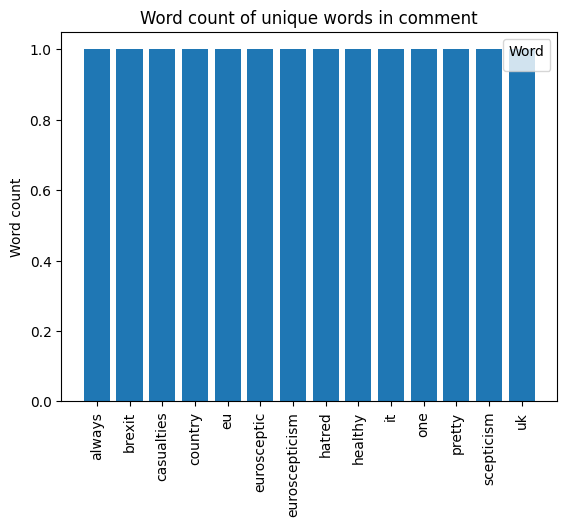

In [ ]:
# initiate count vectoriser
count_vectoriser = CountVectorizer()

# fit_transform() takes a list. Create document term matrix.
matrix_comments = count_vectoriser.fit_transform(string_comments)

# see unique words
unique_words = count_vectoriser.get_feature_names_out()[:6]

# Convert the matrix into a Pandas DataFrame for easier manipulation.
# unique words become headers in matrix
dtm = pd.DataFrame(matrix_comments.toarray(), columns = count_vectoriser.get_feature_names_out())
print(dtm.head())

# sum the count of each unique word.
# This creates a pandas series
sum = dtm.sum()

# convert series to dataframe
df_word_count = sum.to_frame().reset_index()
# set column names
df_word_count.columns = ['words', 'count']

# convert column to a list (this will be our x axis)
x = df_word_count["words"].to_list()
print(x)

# convert count to a list (this will be our y axis)
y = df_word_count["count"].to_list()
print(y)

# create barchart
fig, ax = plt.subplots()

ax.bar(x, y)

ax.set_ylabel('Word count')
ax.set_title('Word count of unique words in comment')
ax.legend(title='Word')

plt.xticks(rotation=90)
plt.show()

Create wordcloud

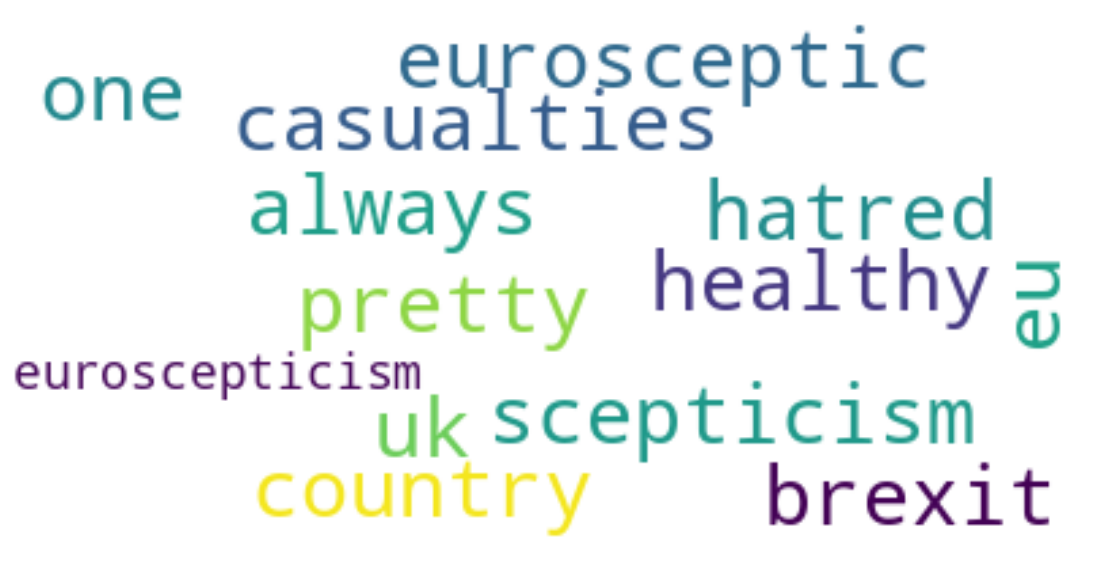

In [ ]:

from nltk.util import ngrams
from wordcloud import WordCloud
ex_word = string_comments[2].split()

# print(list(ngrams(ex_word, 2)))  #<- set value of n as 2
# print(list(ngrams(ex_word, 3)))  #<- set value of n as 3

#Construct a word cloud
ex_wordcloud = WordCloud(max_font_size = 30, background_color = "white", collocations = False)
ex_wordcloud = ex_wordcloud.generate(' '.join(string_comments))

plt.figure(figsize=(14, 20))
plt.imshow(ex_wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()


Take all comments for a given year and create bar chart and wordcloud

In [ ]:
# create copy of dataframe
# create column with date as string

pp_comments_df['Created (UTC)'] = pd.to_datetime(comments_df['Created (UTC)'], unit='s', errors='coerce')

# comments_df['Created (UTC)'] = pd.to_datetime(comments_df['Created (UTC)'],unit='s')

year_df = pp_comments_df.copy()
year_df['year'] = year_df['Created (UTC)']
year_df['year'].dropna(inplace=True)

year_df["year"] = year_df["year"].dt.year.astype("string")



<ipython-input-67-e412f82db0de>:4: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  pp_comments_df['Created (UTC)'] = pd.to_datetime(comments_df['Created (UTC)'], unit='s', errors='coerce')


In [ ]:
# explore data
year_df['year'].describe()

# check which years are in the data
unique_years = year_df['year'].unique()
print(unique_years)

year_df.year.unique()

<StringArray>
['2017.0', '2019.0', '2020.0', <NA>, '2024.0']
Length: 5, dtype: string


<StringArray>
['2017.0', '2019.0', '2020.0', <NA>, '2024.0']
Length: 5, dtype: string

In [ ]:
# Take only comments from certain year
year_input = '2017.0'
year_df = year_df.loc[year_df.year == year_input]

In [ ]:
# take only the comments column
year_df["body_lower_nostop_lem"]


,body_lower_nostop_lem
0,hexagon confirm best shape tessellate look aes...
1,get start triangle lunatic
2,r n g l e u r g e
3,pentagonmasterrace here
5,yeah least agree rhombus load shite
...,...
67501,actually good explanation
67502,hol paper tiger overrule parliament just happe...
67503,understand argument stay problem
67504,no im sure already know eu protectionism reduc...


In [ ]:
# convert pandas series to a list of comments
comments_list = year_df.body_lower_nostop_lem.to_list()
comments_list[1]

'get start triangle lunatic'

In [ ]:
from nltk.tokenize import word_tokenize
# nltk.download('punkt_tab')


df_tokenized = [word_tokenize(comments_list[i]) for i in range(0, len(comments_list))]
df_tokenized
word_counts_per_post = [None] * len(df_tokenized)

for i in range(len(df_tokenized)):
  word_counts_per_post[i] = len(comments_list[i])

In [ ]:
# initiate count vectoriser
vector_all_comments = CountVectorizer()

# transform comments into DTM
dtm_all_comments = vector_all_comments.fit_transform(comments_list)
# get list of words

print(vector_all_comments.get_feature_names_out()[:6])

# convert matrix into pandas dataframe - the unique words are column headers
dtm_all_comments_by_year = pd.DataFrame(dtm_all_comments.toarray(), columns = vector_all_comments.get_feature_names_out())


['000000' '000001' '00001' '0001' '002' '00313']


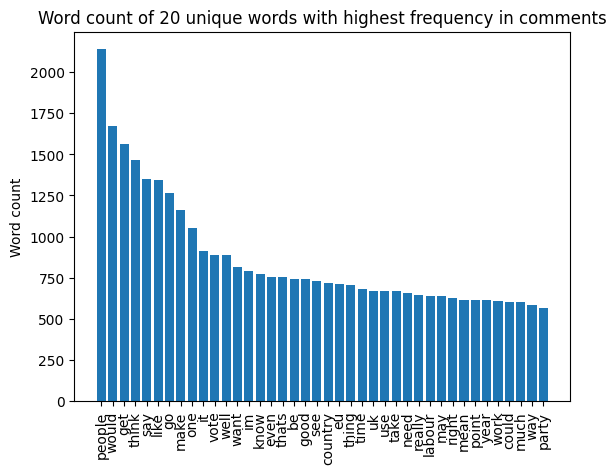

In [ ]:
# sum word counts
corpus_freq_dist = dtm_all_comments_by_year.sum(axis = 0).to_dict()

# calculate frequency distribution
# take 40 most common
corpus_freq_dist = nltk.FreqDist(corpus_freq_dist).most_common(40)

# convert to dictionary and then pandas series
fdist = pd.Series(dict(corpus_freq_dist))

# plot bar chart


x = fdist.index
y = fdist.values

fig, ax = plt.subplots()

ax.bar(x, y)

ax.set_ylabel('Word count')
ax.set_title('Word count of 20 unique words with highest frequency in comments')
plt.xticks(rotation=90)
plt.show()

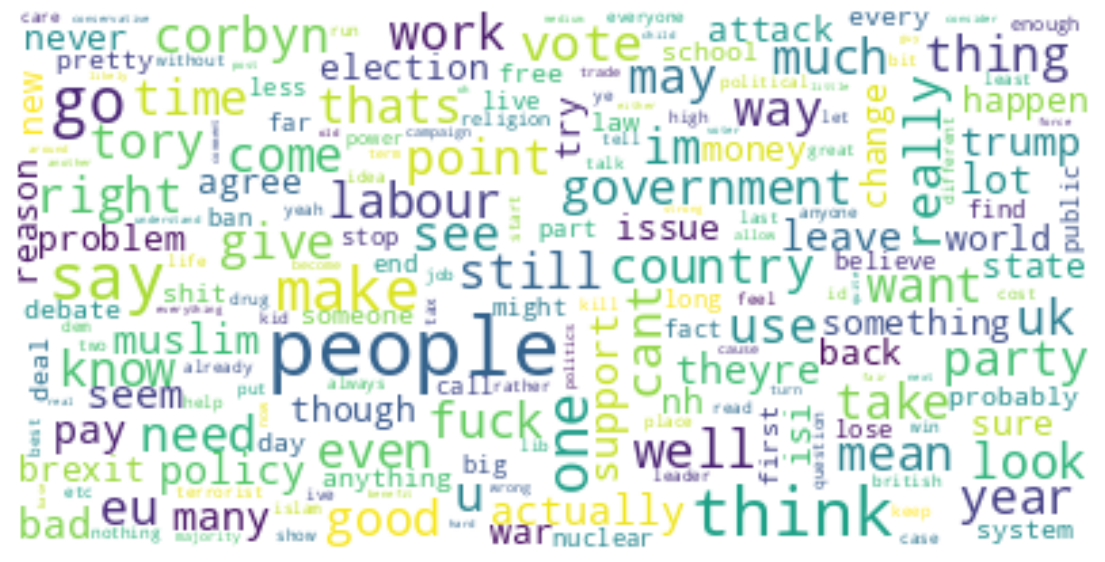

In [ ]:
words_2 = comments_list[2].split()

#Construct word cloud for all comments of that year
wordcloud_2 = WordCloud(max_font_size = 30, background_color = "white", collocations = False)
wordcloud_2 = wordcloud_2.generate(' '.join(comments_list))

plt.figure(figsize=(14, 20))
plt.imshow(wordcloud_2, interpolation = "bilinear")
plt.axis("off")
plt.show()

# **kaggle - EXPLORATORY ANALYSIS**

In [ ]:
combined_df.sample(5)

NameError: name 'combined_df' is not defined

In [ ]:
# Primary analysis - Explore mean post length over time for different subreddits

# Finding certain subreddits by name
def find_subreddit(name):
    return preproc_df.loc[preproc_df['subreddit'].eq(name)]
find_subreddit('books').head()

subred_df = pd.DataFrame(find_subreddit('books'))

# Convert the 'datetime' column to datetime format
subred_df['created_utc'] = pd.to_datetime(subred_df['created_utc'])

# Extract years and putting them into seperate lists
subred_df['year'] = subred_df['created_utc'].dt.year


filtered_df_2016 = subred_df[subred_df['created_utc'].dt.year == 2016]
extract_body_2016 = filtered_df_2016[['body']].copy()

filtered_df_2017 = subred_df[subred_df['created_utc'].dt.year == 2017]
extract_body_2017 = filtered_df_2017[['body']].copy()

filtered_df_2018 = subred_df[subred_df['created_utc'].dt.year == 2018]
extract_body_2018 = filtered_df_2018[['body']].copy()

filtered_df_2019 = subred_df[subred_df['created_utc'].dt.year == 2019]
extract_body_2019 = filtered_df_2019[['body']].copy()

filtered_df_2020 = subred_df[subred_df['created_utc'].dt.year == 2020]
extract_body_2020 = filtered_df_2020[['body']].copy()

filtered_df_2021 = subred_df[subred_df['created_utc'].dt.year == 2021]
extract_body_2021 = filtered_df_2021[['body']].copy()

filtered_df_2022 = subred_df[subred_df['created_utc'].dt.year == 2022]
extract_body_2022 = filtered_df_2022[['body']].copy()


# Getting the length of each comment
extract_body_2016['length'] = extract_body_2016['body'].str.len()

extract_body_2017['length'] = extract_body_2017['body'].str.len()

extract_body_2018['length'] = extract_body_2018['body'].str.len()

extract_body_2019['length'] = extract_body_2019['body'].str.len()

extract_body_2020['length'] = extract_body_2020['body'].str.len()

extract_body_2021['length'] = extract_body_2021['body'].str.len()

extract_body_2022['length'] = extract_body_2022['body'].str.len()


# Calculate the mean length of each comment
mean_length_16 = extract_body_2016['length'].mean()

mean_length_17 = extract_body_2017['length'].mean()

mean_length_18 = extract_body_2018['length'].mean()

mean_length_19 = extract_body_2019['length'].mean()

mean_length_20 = extract_body_2020['length'].mean()

mean_length_21 = extract_body_2021['length'].mean()

mean_length_22 = extract_body_2022['length'].mean()

import matplotlib.pyplot as plt
import numpy as np

xpoints = np.array([2016, 2017, 2018, 2019, 2020, 2021, 2022])
ypoints = np.array([mean_length_16, mean_length_17, mean_length_18, mean_length_19, mean_length_20, mean_length_21, mean_length_22])

plt.xlabel('Year')
plt.ylabel('Mean Post Length')
plt.title('Mean Post Length Per Year')
plt.plot(xpoints, ypoints)
plt.show()


NameError: name 'preproc_df' is not defined

In [ ]:
#
subred_df = pd.DataFrame(fetch_all_time_posts("ukpolitics", post_limit=1000))

subred_df.head(30)

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.bar(subred_df['Score'], subred_df['Number of Comments'] )
plt.xlabel('Score')
plt.ylabel('Number of Comments')
plt.title('')
plt.show()



#  "Post ID": post.id, # Unique ID for each post.
#             "Title": post.title, # Title of Post.
#             "Score": post.score, # Reddit Score given by users. The higher the number the more positive votes given.
#             "Upvote Ratio": post.upvote_ratio, # Ratio of positive v negative votes given as a decimal.
#             "Created (UTC)": post.created_utc, # Date post was created is in UTC.
#             "Number of Comments": post.num_comments,
#             "Short URL": post.shortlink,
#             "Subreddit": post.subreddit_name_prefixed, # A subreddit is a forum within Reddit.
#             "Body": post.selftext if hasattr(post, "selftext") else "", # Extracts the body text of self-posts (text-based posts). Else it defaults to blank.


In [ ]:

# Thea here! Trying to do the 'analyse length of posts containing keywords over time' thing - pray for me

# picking some potential example keywords just to see
keywords = ["boris", "truss"]

# check if there are keywords in the posts
def contains_keywords(post, keywords):
  return any(keyword in post for keyword in keywords)

# create new column for post length (in no. words)
preproc_df['post_length'] = preproc_df['body_lower_no_stop'].apply(lambda x: len(x.split()))

# filter posts containing any of the key words
preproc_df['contains_keywords'] = preproc_df['body_lower_no_stop'].apply(lambda x: contains_keywords(x, keywords))

# filter posts that contain the keywords
filtered_df = preproc_df[preproc_df['contains_keywords']]

# make date column into datetime if it isn't already
filtered_df['created_utc'] = pd.to_datetime(filtered_df['created_utc'], errors='coerce')

# group by date and calculate the mean post length
mean_post_length_over_time = filtered_df.groupby(filtered_df['created_utc'].dt.date)['post_length'].mean()

# plot results
import matplotlib.pyplot as plt

# plot mean post length over time
plt.figure(figsize=(10, 6))
plt.plot(mean_post_length_over_time.index, mean_post_length_over_time.values, marker='o')
plt.xlabel('Date')
plt.ylabel('Mean Post Length')
plt.title('Mean Post Length Over Time for Posts Containing Keywords')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
# Thea again! Above code does a graph combining key words - here is some that should iterate and so give us different graphs for each

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Again, example keywords potentially relevant to UK politics
keywords = ['inflation', 'immigration']

# Again, new column for post length in words
preproc_df['post_length'] = preproc_df['body_lower_no_stop'].apply(lambda x: len(x.split()))

# Make sure date column is in datetime and drop invalid data
preproc_df['created_utc'] = pd.to_datetime(preproc_df['created_utc'], errors='coerce')
preproc_df = preproc_df.dropna(subset=['created_utc'])

# Now plot for each key word!
for keyword in keywords:

  # Filter by posts with the current keyword in
  filtered_df = preproc_df[preproc_df['body_lower_no_stop'].str.contains(keyword)]

  # Group by date and calculate the mean post length
  mean_post_length_over_time = filtered_df.groupby(filtered_df['created_utc'].dt.date)['post_length'].mean()

  # Plot results for the current keyword as before
  plt.figure(figsize=(10, 6))
  plt.plot(mean_post_length_over_time.index, mean_post_length_over_time.values, marker='o')
  plt.xlabel('Date')
  plt.ylabel('Mean Post Length')
  plt.title(f'Mean Post Length Over Time for Posts Containing "{keyword}"')
  plt.xticks(rotation=45)
  plt.grid(True)
  plt.show()

In [ ]:
# Thea again! Gonna try some other data visualisation options -  here's one that'll do keywords on the same graph to compare
plt.figure(figsize=(10, 6))
for keyword in keywords:
    filtered_df = preproc_df[preproc_df['body_lower_no_stop'].str.contains(keyword)]
    mean_post_length_over_time = filtered_df.groupby(filtered_df['created_utc'].dt.date)['post_length'].mean()
    plt.plot(mean_post_length_over_time.index, mean_post_length_over_time.values, marker='o', label=keyword)

plt.xlabel('Date')
plt.ylabel('Mean Post Length')
plt.title('Mean Post Length Over Time for Multiple Keywords')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# For the same keywords, this does a bar chart of how long posts tend to be - good for seeing if they tend to be long, short etc.
for keyword in keywords:

    # Filter data by keyword
    filtered_df = preproc_df[preproc_df['body_lower_no_stop'].str.contains(keyword)]

    # Set up size of plot
    plt.figure(figsize=(8, 5))

    # Make the histogram by post length, format etc.
    plt.hist(filtered_df['post_length'], bins=20, color='skyblue', edgecolor='black')

    # Add labels to the graph axes
    plt.xlabel('Post Length')
    plt.ylabel('Frequency')

    # Add a title & display
    plt.title(f'Distribution of Post Lengths for "{keyword}"')

    plt.show()


# PRAW - EXPLORATORY ANALYSIS
---


## Mean Comment Length of UKPolitics Post Comments Over Time
---

By looking at the mean comment length we can see if people are becoming more or less vocal in their opinion.

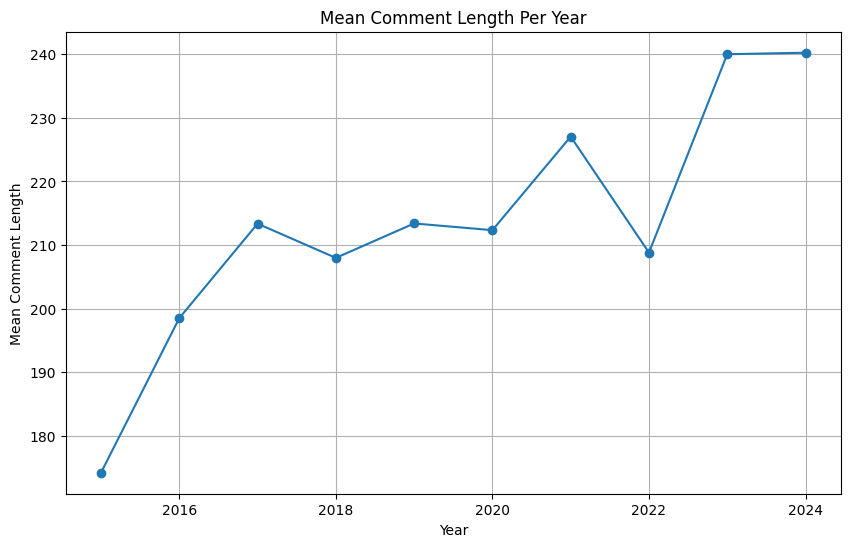

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 'Created (UTC)' needs to be modified so that it is in datetime format
pp_comments_df['Created (UTC)'] = pd.to_datetime(comments_df['Created (UTC)'], unit='s')

# Looking at the last decade
years = range(2015, 2025)

mean_lengths = []

for year in years:
    # Filtering for year
    filtered_df = pp_comments_df[pp_comments_df['Created (UTC)'].dt.year == year]

    # We need to make sure there is a body to calculate length
    if 'Body' in filtered_df.columns:
        extract_body = filtered_df[['Body']].copy()
        extract_body['length'] = extract_body['Body'].str.len()

        # Mean Length Calculation
        mean_lengths.append(extract_body['length'].mean())
    else:
        # When there isn't a body we ignore
        mean_lengths.append(None)

# Plotting a line graph
plt.figure(figsize=(10, 6))
plt.plot(years, mean_lengths, marker='o')
plt.xlabel('Year')
plt.ylabel('Mean Comment Length')
plt.title('Mean Comment Length Per Year')
plt.grid(True)
plt.show()


**Mean Comment Length has an upward trend indicating that people are becoming more vocal over time.**

*How would this look once the [deleted] outliers have been removed?*

## Comment Length Over Time: Scatter and Mean
---

By adding a scatter diagram on top we can look at the fit of our data

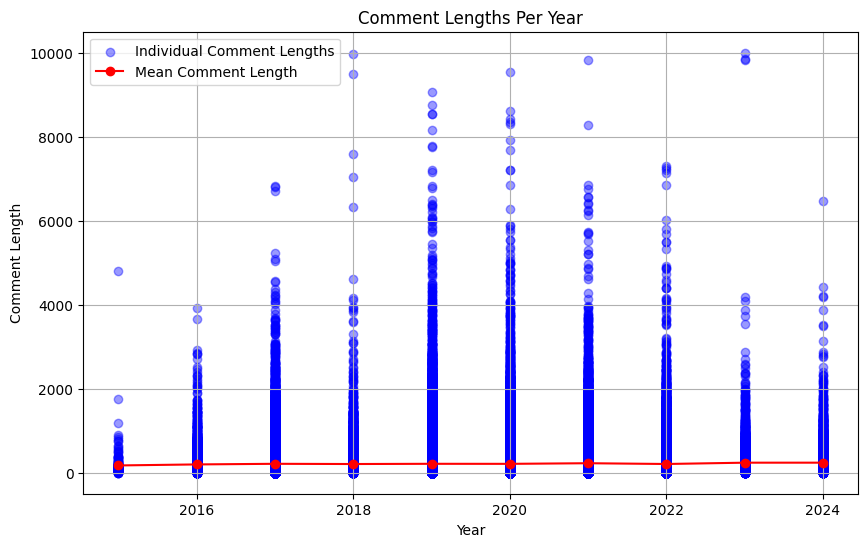

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 'Created (UTC)' needs to be modified so that it is in datetime format
pp_comments_df['Created (UTC)'] = pd.to_datetime(comments_df['Created (UTC)'], unit='s')

# Looking at the last decade
years = range(2015, 2025)

scatter_x = []
scatter_y = []
mean_lengths = []

for year in years:
    # Filtering for year
    filtered_df = pp_comments_df[pp_comments_df['Created (UTC)'].dt.year == year]

    # We need to make sure there is a body to calculate length
    if 'Body' in filtered_df.columns:
        extract_body = filtered_df[['Body']].copy()
        extract_body['length'] = extract_body['Body'].str.len()

        # Adding comment length and year for each comment (scatter)
        scatter_x.extend([year] * len(extract_body))
        scatter_y.extend(extract_body['length'].tolist())

        # Mean Length Calculation
        mean_lengths.append(extract_body['length'].mean())
    else:
        # When there isn't a body we ignore
        mean_lengths.append(None)


plt.figure(figsize=(10, 6))

# Plot Scatter and Line Chart
plt.scatter(scatter_x, scatter_y, alpha=0.4, color='blue', label='Individual Comment Lengths')
plt.plot(years, mean_lengths, marker='o', color='red', label='Mean Comment Length')


plt.xlabel('Year')
plt.ylabel('Comment Length')
plt.title('Comment Lengths Per Year')
plt.legend()
plt.grid(True)

plt.show()

**Mean post length is towards the lower end of the scatter. This shows a high density of posts with few characters.**

## Count of Keywords
---
Let's look at some divisive words.
I have chosen to look at the two main right-leaning parties and only labour as left-leaning. This is because of the many smaller left-leaning parties.

We will also look at the divisive topics of immigration, women's rights and inflation.

We will be looking to see if they follow any sort of trend.

### Individual Dates
---

Using individual dates we can look for outliers.
Let's use a line graph:

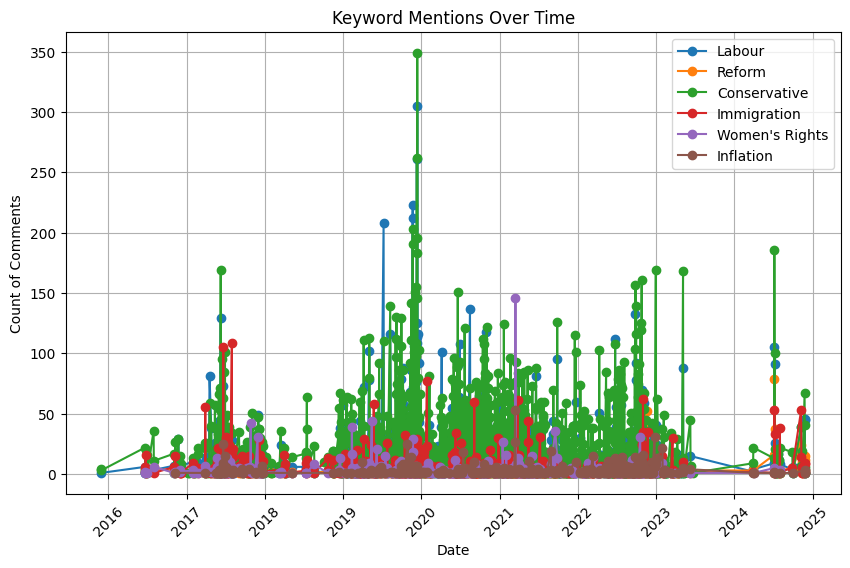

In [ ]:
plt.figure(figsize=(10, 6))

# 'Created (UTC)' needs to be modified so that it is in datetime format
pp_comments_df['Created (UTC)'] = pd.to_datetime(pp_comments_df['Created (UTC)'], unit='s')

keywords = {
    'Labour': ['labour'],
    'Reform': ['reform'],
    'Conservative': ['tory', 'tories', 'conservative', 'conservatives'],
    'Immigration': ['immigration','migrant','migrants','immigrant','immigrants'],
    "Women's Rights": ["women's rights", 'women rights', 'feminism', 'gender equality', 'women'],
    'Inflation': ['inflation','cost of living']
}

for keyword_group, terms in keywords.items():
    # We need to create a regex pattern so we can match them to the body and count the instances
    regex_pattern = '|'.join(terms)

    # Filtering rows to see if they contain any of the terms
    filtered_df = pp_comments_df[pp_comments_df['body_lower'].str.contains(regex_pattern, case=False, na=False)]

    # Grouping by date
    count_over_time = filtered_df.groupby(filtered_df['Created (UTC)'].dt.date).size()

    plt.plot(count_over_time.index, count_over_time.values, marker='o', label=keyword_group)

plt.xlabel('Date')
plt.ylabel('Count of Comments')
plt.title('Keyword Mentions Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.show()

**As there are too many points the data becomes hard to read**

### Monthly Data
---

Monthly data might show a better trend analysis.
This can be useful for looking at months pre/post election.

<ipython-input-46-d311df754c32>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['month'] = filtered_df['Created (UTC)'].dt.to_period('M')  # Convert to month periods
<ipython-input-46-d311df754c32>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['month'] = filtered_df['Created (UTC)'].dt.to_period('M')  # Convert to month periods
<ipython-input-46-d311df754c32>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

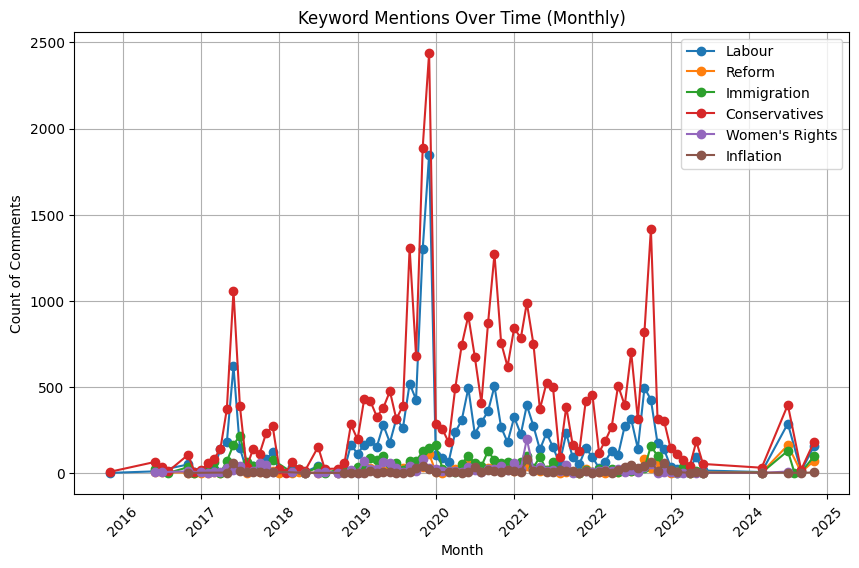

In [ ]:
plt.figure(figsize=(10, 6))

# 'Created (UTC)' needs to be modified so that it is in datetime format
pp_comments_df['Created (UTC)'] = pd.to_datetime(pp_comments_df['Created (UTC)'], unit='s')

keywords = {
    'Labour': ['labour'],
    'Reform': ['reform'],
    'Conservatives': ['tory', 'tories', 'conservative', 'conservatives'],
    'Immigration': ['immigration','migrant','migrants','immigrant','immigrants'],
    "Women's Rights": ["women's rights", 'women rights', 'feminism', 'gender equality', 'women'],
    'Inflation': ['inflation','cost of living']
}

for keyword_group, terms in keywords.items():
    # We need to create a regex pattern so we can match them to the body and count the instances
    regex_pattern = '|'.join(terms)

    # Filtering rows to see if they contain any of the terms
    filtered_df = pp_comments_df[pp_comments_df['body_lower'].str.contains(regex_pattern, case=False, na=False)]

    # Grouping by month
    filtered_df['month'] = filtered_df['Created (UTC)'].dt.to_period('M')  # Convert to month periods
    count_over_time = filtered_df.groupby('month').size()

    plt.plot(count_over_time.index.to_timestamp(), count_over_time.values, marker='o', label=keyword_group)

plt.xlabel('Month')
plt.ylabel('Count of Comments')
plt.title('Keyword Mentions Over Time (Monthly)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.show()


**Political parties are spoken about more often than issues which makes issues harder to read.**

*We should separate for better analysis*

### Monthly Political Party Data
---

<ipython-input-45-351868418a5d>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['month'] = filtered_df['Created (UTC)'].dt.to_period('M')  # Convert to month periods
<ipython-input-45-351868418a5d>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['month'] = filtered_df['Created (UTC)'].dt.to_period('M')  # Convert to month periods
<ipython-input-45-351868418a5d>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

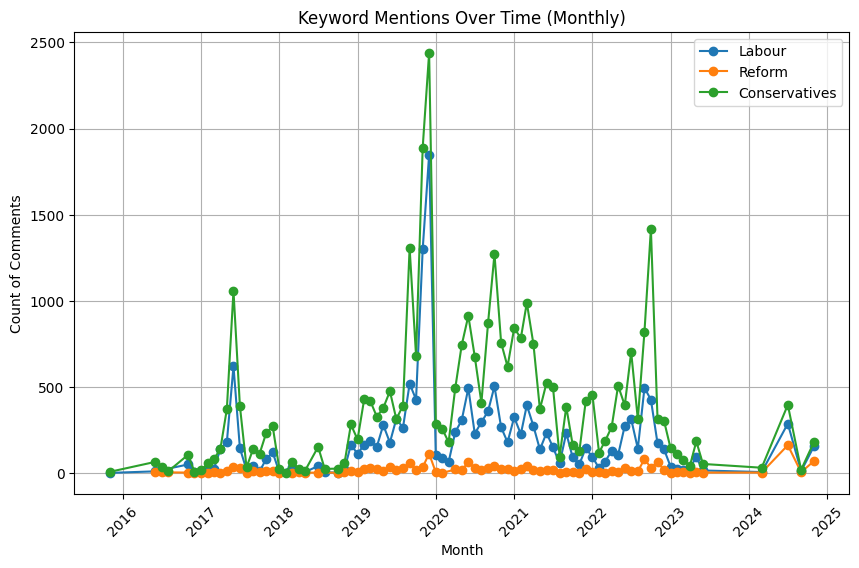

In [ ]:
plt.figure(figsize=(10, 6))

# 'Created (UTC)' needs to be modified so that it is in datetime format
pp_comments_df['Created (UTC)'] = pd.to_datetime(pp_comments_df['Created (UTC)'], unit='s')

keywords = {
    'Labour': ['labour'],
    'Reform': ['reform'],
    'Conservatory': ['tory', 'tories', 'conservative', 'conservatives'],
}

for keyword_group, terms in keywords.items():
    # We need to create a regex pattern so we can match them to the body and count the instances
    regex_pattern = '|'.join(terms)

    # Filter for rows containing any of the terms
    filtered_df = pp_comments_df[pp_comments_df['body_lower'].str.contains(regex_pattern, case=False, na=False)]

    # Grouping by month
    filtered_df['month'] = filtered_df['Created (UTC)'].dt.to_period('M')  # Convert to month periods
    count_over_time = filtered_df.groupby('month').size()

    plt.plot(count_over_time.index.to_timestamp(), count_over_time.values, marker='o', label=keyword_group)

plt.xlabel('Month')
plt.ylabel('Count of Comments')
plt.title('Keyword Mentions Over Time (Monthly)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.show()

**Conservatives are spoken about more often.**

### Monthly Divisive Issue Data
---


<ipython-input-43-fa9df2efad41>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['month'] = filtered_df['Created (UTC)'].dt.to_period('M')  # Convert to month periods
<ipython-input-43-fa9df2efad41>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['month'] = filtered_df['Created (UTC)'].dt.to_period('M')  # Convert to month periods
<ipython-input-43-fa9df2efad41>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

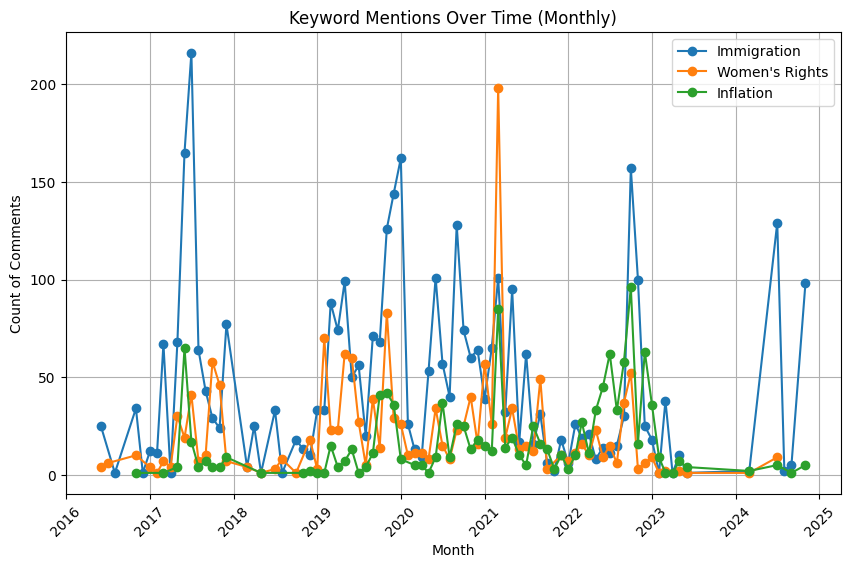

In [ ]:
plt.figure(figsize=(10, 6))

# 'Created (UTC)' needs to be modified so that it is in datetime format
pp_comments_df['Created (UTC)'] = pd.to_datetime(pp_comments_df['Created (UTC)'], unit='s')

keywords = {
    'Immigration': ['immigration','migrant','migrants','immigrant','immigrants'],
    "Women's Rights": ["women's rights", 'women rights', 'feminism', 'gender equality', 'women'],
    'Inflation': ['inflation','cost of living']
}

for keyword_group, terms in keywords.items():
    # We need to create a regex pattern so we can match them to the body and count the instances
    regex_pattern = '|'.join(terms)

    # Filtering rows to see if they contain any of the terms
    filtered_df = pp_comments_df[pp_comments_df['body_lower'].str.contains(regex_pattern, case=False, na=False)]

    # Grouping by month
    filtered_df['month'] = filtered_df['Created (UTC)'].dt.to_period('M')  # Convert to month periods
    count_over_time = filtered_df.groupby('month').size()

    plt.plot(count_over_time.index.to_timestamp(), count_over_time.values, marker='o', label=keyword_group)

plt.xlabel('Month')
plt.ylabel('Count of Comments')
plt.title('Keyword Mentions Over Time (Monthly)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.show()

**Immigration seems to peak around election times**